## 1)Load and process the concerned data, you will use time_series_covid_19_confirmed

In [3]:
##Importing Libraries
import pandas as pd
import numpy as np

##Loading Csv File
COVID_19_DATA=pd.read_csv("time_series_covid_19_confirmed.csv")
##Rrestricting Data to 27th May andRemoving Lat long columns as they are not needed

COVID_19_DATA=COVID_19_DATA.drop(['Lat','Long','5/28/20','5/29/20','5/30/20','Lat','Long'],axis=1)

#Grouping Contries acccording to their provinces as we are dealing with country level

COVID_19_DATA_GROUPED=COVID_19_DATA.groupby("Country/Region").sum().reset_index()

##Separating Pakistan Dataset for Comparision

COVID_19_DATA_PAK=COVID_19_DATA_GROUPED.loc[COVID_19_DATA_GROUPED["Country/Region"]=="Pakistan"]

COVID_19_DATA_GROUPED


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,313,319,329,329,335,336,340,342,342,342,343,344,344,353,353,353,362,371,374,375,375,375,375,375,375,375,375,375,376,381,388,391,398,423,423,423,423,423,429,434
184,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,9,9,9,9
185,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256
186,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57,61,65,70,74,76,84,84,88,88,95,97,106,109,119,124,137,138,146,153,167,252,267,267,441,446,654,654,679,753,761,772,832,866,920,920,920,920,920,1057


In [4]:
COVID_19_DATA_PAK

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
130,Pakistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,4,...,7638,8348,8418,9565,10076,11155,11940,12723,13328,13915,14612,15525,16817,18114,19103,20084,20941,22049,24073,24644,26435,28736,30334,32081,34336,35298,35788,38799,38799,40151,42125,43966,45898,48091,50694,52437,54601,56349,57705,59151


##Calulating Days for Reported Cases

In [0]:
##Calcuating Days for reported cases 
no_of_rows=COVID_19_DATA_GROUPED.shape[0]

##Number of days in which cases are reported and non zero
##Usin fillna also in case of nan values

reported_days=COVID_19_DATA_GROUPED.iloc[:,1:].fillna(0)
reported_days=reported_days.astype(bool).sum(axis=1).reset_index().to_numpy()

##For Pakistan Seprately for finding difference

reported_days_PAK=COVID_19_DATA_PAK.iloc[:,1:].fillna(0)
reported_days_PAK=reported_days_PAK.astype(bool).sum(axis=1).reset_index().to_numpy()

##Iterating through rows
for x in range(0,no_of_rows):
    if((reported_days[:,1]-reported_days_PAK[:,1])[x]< 0):
      COVID_19_DATA_GROUPED.drop(x,inplace=True)


##Creating new Column with Name Day and appending 
column_new = ["Country/Region"]
for x in range(0,92):
    column_new.append("Day"+str(x+1))

##Numpy Array of COVID_19_Grouped data
COVID_19_DATA_ARRAY= COVID_19_DATA_GROUPED.to_numpy()

#No of coountries
c= COVID_19_DATA_ARRAY.shape[0]

#Loop through all the countries. 
for x in range(0,c):
    #Count number of zeros.
    zeros = COVID_19_DATA_ARRAY[x,1:].shape[0]-np.count_nonzero(COVID_19_DATA_ARRAY[x,1:])
    #Replace first 92 indices in array with first 92 non-zero values in array.
    COVID_19_DATA_ARRAY[x,1:93] = COVID_19_DATA_ARRAY[x,zeros+1:zeros+93]

#Create new dataframe which contains non-zero data for first 92 days.    
COVID_19_92days = pd.DataFrame(data=COVID_19_DATA_ARRAY[:,0:93],columns=column_new)

COVID_19_92days

,Country/Region,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,Day11,Day12,Day13,Day14,Day15,Day16,Day17,Day18,Day19,Day20,Day21,Day22,Day23,Day24,Day25,Day26,Day27,Day28,Day29,Day30,Day31,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,...,Day53,Day54,Day55,Day56,Day57,Day58,Day59,Day60,Day61,Day62,Day63,Day64,Day65,Day66,Day67,Day68,Day69,Day70,Day71,Day72,Day73,Day74,Day75,Day76,Day77,Day78,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Day89,Day90,Day91,Day92
0,Afghanistan,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,...,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
1,Algeria,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697
2,Australia,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,30,39,52,...,568,681,791,1071,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010,6108,6215,6303,6315,6351,6415,6440,6462,6522,6568,6610,6623,6645,6652,6662,6677,6694,6714
3,Austria,2,2,3,3,9,14,18,21,29,41,55,79,104,131,182,246,302,504,655,860,1018,1332,1646,2013,2388,2814,3582,4474,5283,5588,6909,7657,8271,8788,9618,10180,10711,11129,11524,...,14595,14671,14749,14795,14873,14925,15002,15071,15148,15225,15274,15357,15402,15452,15531,15558,15597,15621,15650,15684,15752,15774,15833,15871,15882,15961,15997,16058,16109,16201,16242,16269,16321,16353,16404,16436,16486,16503,16539,16557
4,Bahrain,1,23,33,33,36,41,47,49,49,52,55,60,85,85,95,110,195,195,195,210,214,214,228,256,278,285,305,334,377,392,419,458,466,476,499,515,567,569,643,...,1700,1740,1773,1881,1907,1973,2027,2217,2518,2588,2647,2723,2811,2921,3040,3170,3284,3383,3533,3720,3934,4199,4444,4774,4941,5236,5531,5816,6198,6583,6747,6956,7184,7532,7888,8174,8414,8802,9138,9171
5,Belgium,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,8,13,23,50,109,169,200,239,267,314,314,559,...,7284,9134,10836,11899,12775,13964,15348,16770,18431,19691,20814,22194,23403,24983,26667,28018,29647,30589,31119,33573,34809,36138,37183,38496,39983,40956,41889,42797,44293,45325,46134,46687,47334,47859,48519,49032,49517,49906,50267,50509
6,Brazil,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,...,36658,38654,40743,43079,45757,50036,54043,59324,63100,67446,73235,79685,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291,233511,241080,255368,271885,291579,310087,330890,347398,363211,374898,391222,411821
7,Cambodia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,37,51,53,84,87,91,96,96,99,99,103,107,109,109,110,114,114,114,114,115,117,119,119,120,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
8,Canada,1,1,2,2,2,4,4,4,4,4,5,5,7,7,7,7,7,7,7,7,7,7,8,8,8,8,9,9,9,10,11,11,13,14,20,24,27,30,33,...,657,800,943,1277,1469,2088,2790,3251,4042,4682,5576,6280,7398,8527,9560,11284,12437,12978,15756,16563,17872,19141,20654,22059,23316,24299,25680,27035,28209,30809,32814,34356,35633,37658,39402,41663,43299,44919,46371,48033
9,China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,...,80977,81003,81033,81058,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432,82511,82543,82602,82665,82718,82809,82883,82941,83014,83134,83213,833

In [0]:
##Finding the Relation Between Countries to find the best related countries

##Taking Transpose
COVID_19_transposed = COVID_19_92days.set_index("Country/Region").transpose()

##Sparating countories list the dataset
country_list = COVID_19_92days["Country/Region"].tolist()
##Starting
COVID_19_transposed = COVID_19_transposed.reset_index().iloc[:,1:]

##Correaltion array
corr_country = []
##Loopping through
for country in country_list:
    corr_data = COVID_19_transposed["Pakistan"].astype('float64').corr(COVID_19_transposed[country].astype('float64'))
    corr_country.append(corr_data)

##Converting to datafrmae
corr_df = pd.DataFrame({'Country/Region':countries,"Correlation with Pakistan":corr_country})  
##Fecthing Top 5 Countres   
top_5_countries = (corr_df.nlargest(6,"Correlation with Pakistan").iloc[1:])["Country/Region"].tolist()
top_5_countries.append('Pakistan')
display(corr_df.nlargest(6,"Correlation with Pakistan").iloc[1:]) 

,Country/Region,Correlation with Pakistan
12,Egypt,0.998420
4,Bahrain,0.998010
39,Sweden,0.997752
13,Finland,0.993862
31,Oman,0.993584


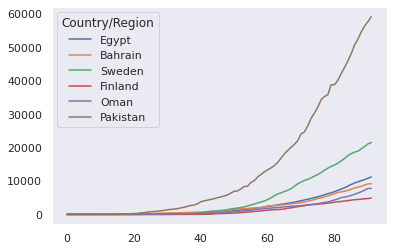

In [0]:
##Plotting the Data Trends
##Importing Library
import matplotlib.pyplot as plt
import seaborn as sns

##Showing he the Graph Upto 27th May data
display(COVID_19_transposed.loc[:,top_5_countries].plot())
plt.grid(False)

3)	Use the data of these countries to predict the spread of Coronavirus in Pakistan. Your prediction must start from 10th May and until 27th June so you will also be predicting trend for one month into the future (31 days into future).

In [0]:
##Using Data of 5 High Related Countries for prediction in Pakistan
import torch
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

##DeletingZeros
def remove(entry):
    remove_zero = np.copy(entry)
    ##Using np.count function
    total =remove_zero.shape[0]-np.count_nonzero(remove_zero)
    return entry[total:]

#Consecetive Entries Difference
def entry_diff(entry,interval= 1):
    new_entry = np.copy(entry)
    for x in range(1,entry.shape[0]):
        new_entry[x] = entry[x] - entry[x-1]
    return new_entry


Our dataset is not normalized at the moment.It is very important to normalize the data for time series predictions. We will perform min/max scaling on the dataset which normalizes the data within a certain range of minimum and maximum values. We will be using the MinMaxScaler class from the sklearn.preprocessing module to scale our data.

In [0]:
##For Normalization 
##Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
##Using Regularization Techniques

def root_mean_square_error(forcast,original):
    ##Using np.sqrt function
    return np.sqrt(np.sum(((forcast-original)**2))/forcast.shape[0])  


##Scaling Function
def scaling(input_data):  
    ##Scaling from -1 to 1
    output_data = MinMaxScaler(feature_range=(-1, 1))
    norm_output_data= output_data.fit_transform(input_data.reshape(-1, 1))
    return norm_output_data,output_data

##Converting into Tensors
def convert(input_data):
    ##Using .floatTensor function
    norm_output_data = torch.FloatTensor(input_data).view(-1)
    return norm_output_data


#Converting input training data into Sequences
def make_seq(input_data, rs):
    make_seq = []
    for x in range((len(input_data))-rs):
        train_seq = input_data[x:x+rs]
        marker = input_data[x+rs:x+rs+1]
        ##Appending
        make_seq.append((train_seq ,marker))
    return make_seq


#LSTM Class to train the model
#Which comes from nn.Module class of the PyTorch library

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

##Optimization 
def optimize(epochs,train_inout_seq,model,optimizer):
    for i in range(epochs):
        for seq, labels in train_inout_seq:
            optimizer.zero_grad()
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                            torch.zeros(1, 1, model.hidden_layer_size))

            y_pred = model(seq)

            single_loss = loss_function(y_pred, labels)
            single_loss.backward()
            optimizer.step()

        if i%25 == 1:
            print(f'No of epoch: {i:3} Total Loss: {single_loss.item():10.8f}')

    print(f'no of epoch: {i:3} Total loss: {single_loss.item():10.10f}')

def predict(fut_pred,test_inputs,model,tw):
    for i in range(fut_pred):
        seq = torch.FloatTensor(test_inputs[-tw:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                            torch.zeros(1, 1, model.hidden_layer_size))
            test_inputs.append(model(seq).item())
    return test_inputs    



##Pakistan COVID_19 Forcasting based on Egypt Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
##Traiing on Egypt Data
##Calulating Difference Sequence and saving to numpy array
train_set = entry_diff(remove(COVID_19_transposed["Egypt"].to_numpy()))
##Using Scaling Function
train_set = train_set[:-18]
train_set,scaler = scaling(train_set)
##Converting to pytorch Tensors
norm_output_data = convert(train_set)
##Geneting seqeunces
train_make_seq = make_seq(norm_output_data,15)
##Initializing LSTM model and serring hidden layer
lstm_model = LSTM(hidden_layer_size=140)
##Loss function 
loss_function = nn.MSELoss()
##Using Pytorch Optimizer
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
optimize(160,train_make_seq,lstm_model,optimizer)
##Modeling
lstm_model.eval()




No of epoch:   1 Total Loss: 0.65449017
No of epoch:  26 Total Loss: 0.01917774
No of epoch:  51 Total Loss: 0.00257567
No of epoch:  76 Total Loss: 0.01134142
No of epoch: 101 Total Loss: 0.00924868
No of epoch: 126 Total Loss: 0.00678606
No of epoch: 151 Total Loss: 0.01130298
no of epoch: 159 Total loss: 0.0084603168
Root Mean Square Error for Egypyt:  79.95
Root Mean Square Error for Pakistan using Egpyt Data Forcasting:  1520.08


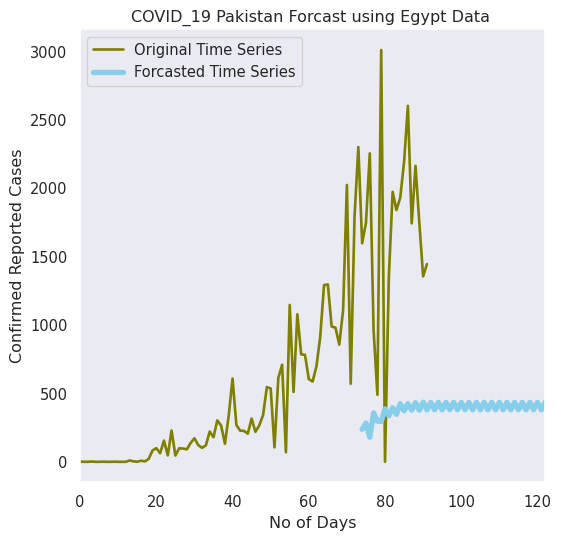

Root Mean Square Error for Egypyt:  51.77
Root Mean Square Error for Pakistan using Egpyt Data Forcasting:  1509.8


In [0]:
##Graph PLoting
##Importing Libary for plotting
import matplotlib.pyplot as plt
future_forcast=49

#Ranging test inputs
check_entries = norm_output_data[-15:].tolist()
##Predictor fnction calling on test data 
check_entries= predict(49,check_entries,lstm_model,15)
##Actual Forcasting
forcast_egypt= scaler.inverse_transform(np.array(check_entries[15:] ).reshape(-1, 1))
##Setting initial and Final points to find the range
initial = (remove(COVID_19_transposed["Egypt"].to_numpy())).shape[0] - 18
final = initial+future_forcast
x = np.arange(initial,final, 1)

##For Pakistan using Egypt Data
# Initialise Graph Size with Dpi
my_dpi=96
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
##Seeting Graphs plot parameters
plt.plot(entry_diff(remove(COVID_19_transposed["Pakistan"]).to_numpy()),color='olive', linewidth=2, linestyle='solid', label="toto")
plt.plot(x,forcast_egypt, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title("COVID_19 Pakistan Forcast using Egypt Data ")
plt.ylabel('Confirmed Reported Cases')
plt.xlabel('No of Days')
plt.legend(["Original Time Series","Forcasted Time Series"])
plt.grid(False)
plt.autoscale(axis='x', tight=True)
plt.show()

##Calculating Root mean square error
egypt_rmse = root_mean_square_error(forcast_egypt.flatten()[0:18],
            (entry_diff(COVID_19_transposed["Egypt"]))[-18:])
print("Root Mean Square Error for Egypyt: ",round(egypt_rmse,2))
pak_rmse= root_mean_square_error(forcast_egypt.flatten()[0:18],
          (entry_diff(COVID_19_transposed["Pakistan"]))[-18:])
print("Root Mean Square Error for Pakistan using Egpyt Data Forcasting: ",round(pak_rmse,2))

##Pakistan COVID_19 Forcasting based on Bahrain Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
##Traiing on Bahrain Data
##Calulating Difference Sequence and saving to numpy array
train_set = entry_diff(remove(COVID_19_transposed["Bahrain"].to_numpy()))
##Using Scaling Function
train_set = train_set[:-18]
train_set,scaler = scaling(train_set)
##Converting to pytorch Tensors
norm_output_data = convert(train_set)
##Geneting seqeunces
train_make_seq = make_seq(norm_output_data,16)
##Initializing LSTM model and serring hidden layer
lstm_model = LSTM(hidden_layer_size=150)
##Loss function 
loss_function = nn.MSELoss()
##Using Pytorch Optimizer
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
optimize(160,train_make_seq,lstm_model,optimizer)
##Modeling
lstm_model.eval()



No of epoch:   1 Total Loss: 0.85104567
No of epoch:  26 Total Loss: 0.36804491
No of epoch:  51 Total Loss: 0.34692448
No of epoch:  76 Total Loss: 0.04967645
No of epoch: 101 Total Loss: 0.00114992
No of epoch: 126 Total Loss: 0.00014002
No of epoch: 151 Total Loss: 0.00611613
no of epoch: 159 Total loss: 0.0054602385


LSTM(
  (lstm): LSTM(1, 150)
  (linear): Linear(in_features=150, out_features=1, bias=True)
)

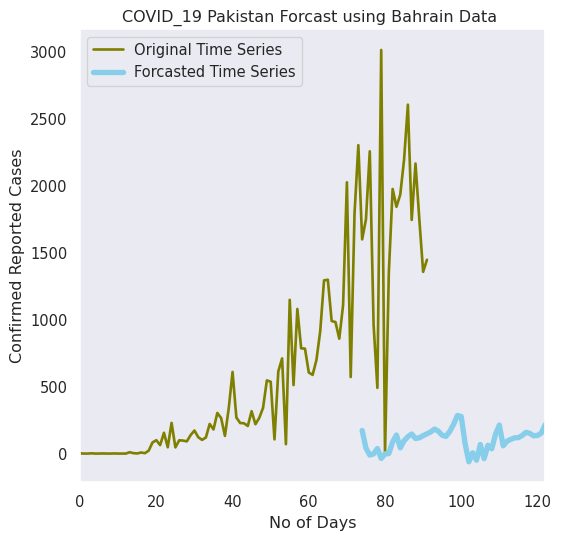

Root Mean Square Error for Bahrain:  51.77
Root Mean Square Error for Pakistan using Bahrain Data Forcasting:  1755.77


In [0]:
##Graph PLoting
##Importing Libary for plotting
import matplotlib.pyplot as plt
future_forcast=49

#Ranging test inputs
check_entries = norm_output_data[-16:].tolist()
##Predictor fnction calling on test data 
check_entries= predict(49,check_entries,lstm_model,16)
##Actual Forcasting
forcast_bahrain= scaler.inverse_transform(np.array(check_entries[16:] ).reshape(-1, 1))
##Setting initial and Final points to find the range
initial = (remove(COVID_19_transposed["Bahrain"].to_numpy())).shape[0] - 18
final = initial+future_forcast
x = np.arange(initial,final, 1)


##For Pakistan using Egypt Data
# Initialise Graph Size with Dpi
my_dpi=96
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
##Seeting Graphs plot parameters
plt.plot(entry_diff(remove(COVID_19_transposed["Pakistan"]).to_numpy()),color='olive', linewidth=2, linestyle='solid', label="toto")
plt.plot(x,forcast_bahrain, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title("COVID_19 Pakistan Forcast using Bahrain Data ")
plt.ylabel('Confirmed Reported Cases')
plt.xlabel('No of Days')
plt.legend(["Original Time Series","Forcasted Time Series"])
plt.grid(False)
plt.autoscale(axis='x', tight=True)
plt.show()


##Calculating Root mean square error
bahrain_rmse = root_mean_square_error(forcast_bahrain.flatten()[0:18],
            (entry_diff(COVID_19_transposed["Bahrain"]))[-18:])
print("Root Mean Square Error for Bahrain: ",round(egypt_rmse,2))
pak_rmse= root_mean_square_error(forcast_bahrain.flatten()[0:18],
          (entry_diff(COVID_19_transposed["Pakistan"]))[-18:])
print("Root Mean Square Error for Pakistan using Bahrain Data Forcasting: ",round(pak_rmse,2))

## Pakistan COVID_19 Forcasting  Using Sweden Data

epoch:   1 loss: 0.09295924
epoch:  26 loss: 0.02529471
epoch:  51 loss: 0.00254682
epoch:  76 loss: 0.00018393
epoch: 101 loss: 0.00778449
epoch: 126 loss: 0.00257108
epoch: 151 loss: 0.00390411
epoch: 159 loss: 0.0000011354


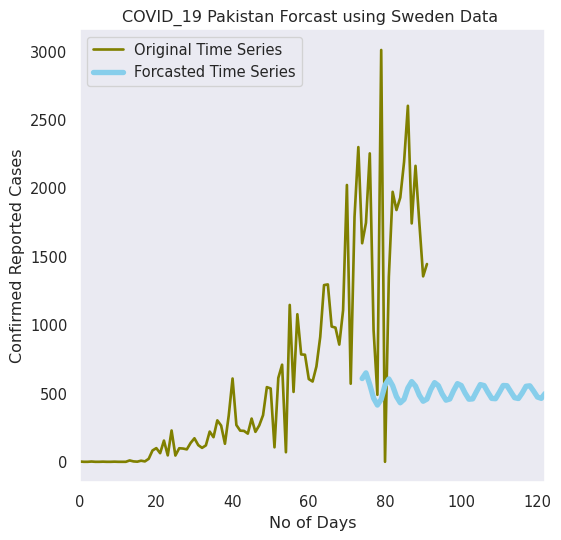

Root Mean Square Error for Sweden:  197.42
Root Mean Square Error for Pakistan using Sweden Data Forcasting:  1362.32


In [0]:
from sklearn.preprocessing import MinMaxScaler
##Traiing on Sweden Data
##Calulating Difference Sequence and saving to numpy array
train_set = entry_diff(remove(COVID_19_transposed["Sweden"].to_numpy()))
##Using Scaling Function
train_set = train_set[:-18]
train_set,scaler = scaling(train_set)
##Converting to pytorch Tensors
norm_output_data = convert(train_set)
##Geneting seqeunces
train_make_seq = make_seq(norm_output_data,30)
##Initializing LSTM model and serring hidden layer
lstm_model = LSTM(hidden_layer_size=100)
##Loss function 
loss_function = nn.MSELoss()
##Using Pytorch Optimizer
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
optimize(160,train_make_seq,lstm_model,optimizer)
##Modeling
lstm_model.eval()
##Graph PLoting
##Importing Libary for plotting
import matplotlib.pyplot as plt
future_forcast=49

#Ranging test inputs
check_entries = norm_output_data[-30:].tolist()
##Predictor fnction calling on test data 
check_entries= predict(49,check_entries,lstm_model,30)
##Actual Forcasting
forcast_Sweden= scaler.inverse_transform(np.array(check_entries[30:] ).reshape(-1, 1))
##Setting initial and Final points to find the range
initial = (remove(COVID_19_transposed["Sweden"].to_numpy())).shape[0] - 18
final = initial+future_forcast
x = np.arange(initial,final, 1)


##For Pakistan using Sweden Data
# Initialise Graph Size with Dpi
my_dpi=96
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
##Seeting Graphs plot parameters
plt.plot(entry_diff(remove(COVID_19_transposed["Pakistan"]).to_numpy()),color='olive', linewidth=2, linestyle='solid', label="toto")
plt.plot(x,forcast_Sweden, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title("COVID_19 Pakistan Forcast using Sweden Data ")
plt.ylabel('Confirmed Reported Cases')
plt.xlabel('No of Days')
plt.legend(["Original Time Series","Forcasted Time Series"])
plt.grid(False)
plt.autoscale(axis='x', tight=True)
plt.show()

##Calculating Root mean square error
sweden_rmse = root_mean_square_error(forcast_Sweden.flatten()[0:18],
            (entry_diff(COVID_19_transposed["Sweden"]))[-18:])
print("Root Mean Square Error for Sweden: ",round(sweden_rmse,2))
pak_rmse= root_mean_square_error(forcast_Sweden.flatten()[0:18],
          (entry_diff(COVID_19_transposed["Pakistan"]))[-18:])
print("Root Mean Square Error for Pakistan using Sweden Data Forcasting: ",round(pak_rmse,2))




## Pakistan COVID_19 Forcasting  Using Finland Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
##Traiing on Finland Data
##Calulating Difference Sequence and saving to numpy array
train_set = entry_diff(remove(COVID_19_transposed["Finland"].to_numpy()))
##Using Scaling Function
train_set = train_set[:-18]
train_set,scaler = scaling(train_set)
##Converting to pytorch Tensors
norm_output_data = convert(train_set)
##Geneting seqeunces
train_make_seq = make_seq(norm_output_data,16)
##Initializing LSTM model and serring hidden layer
lstm_model = LSTM(hidden_layer_size=100)
##Loss function 
loss_function = nn.MSELoss()
##Using Pytorch Optimizer
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
optimize(160,train_make_seq,lstm_model,optimizer)
##Modeling
lstm_model.eval()

No of epoch:   1 Total Loss: 0.07247534
No of epoch:  26 Total Loss: 0.00847591
No of epoch:  51 Total Loss: 0.00045779
No of epoch:  76 Total Loss: 0.00001151
No of epoch: 101 Total Loss: 0.00454124
No of epoch: 126 Total Loss: 0.00811295
No of epoch: 151 Total Loss: 0.00280342
no of epoch: 159 Total loss: 0.0033410690


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

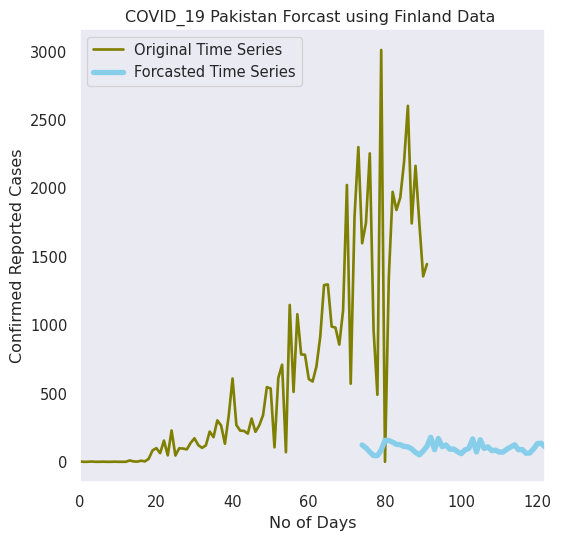

Root Mean Square Error for Finland:  42.74
Root Mean Square Error for Pakistan using Finland Data Forcasting:  1735.12


In [0]:
##Graph PLoting
##Importing Libary for plotting
import matplotlib.pyplot as plt
future_forcast=49

#Ranging test inputs
check_entries = norm_output_data[-16:].tolist()
##Predictor fnction calling on test data 
check_entries= predict(49,check_entries,lstm_model,16)
##Actual Forcasting
forcast_finland= scaler.inverse_transform(np.array(check_entries[16:] ).reshape(-1, 1))
##Setting initial and Final points to find the range
initial = (remove(COVID_19_transposed["Finland"].to_numpy())).shape[0] - 18
final = initial+future_forcast
x = np.arange(initial,final, 1)


##For Pakistan using Finland Data
# Initialise Graph Size with Dpi
my_dpi=96
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
##Seeting Graphs plot parameters
plt.plot(entry_diff(remove(COVID_19_transposed["Pakistan"]).to_numpy()),color='olive', linewidth=2, linestyle='solid', label="toto")
plt.plot(x,forcast_finland, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title("COVID_19 Pakistan Forcast using Finland Data ")
plt.ylabel('Confirmed Reported Cases')
plt.xlabel('No of Days')
plt.legend(["Original Time Series","Forcasted Time Series"])
plt.grid(False)
plt.autoscale(axis='x', tight=True)
plt.show()

##Calculating Root mean square error
finland_rmse = root_mean_square_error(forcast_finland.flatten()[0:18],
            (entry_diff(COVID_19_transposed["Finland"]))[-18:])
print("Root Mean Square Error for Finland: ",round(finland_rmse,2))
pak_rmse= root_mean_square_error(forcast_finland.flatten()[0:18],
          (entry_diff(COVID_19_transposed["Pakistan"]))[-18:])
print("Root Mean Square Error for Pakistan using Finland Data Forcasting: ",round(pak_rmse,2))


##Pakistan COVID_19 Forcasting Using Oman Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
##Traiing on Oman Data
##Calulating Difference Sequence and saving to numpy array
train_set = entry_diff(remove(COVID_19_transposed["Oman"].to_numpy()))
##Using Scaling Function
train_set = train_set[:-18]
train_set,scaler = scaling(train_set)
##Converting to pytorch Tensors
norm_output_data = convert(train_set)
##Geneting seqeunces
train_make_seq = make_seq(norm_output_data,16)
##Initializing LSTM model and serring hidden layer
lstm_model = LSTM(hidden_layer_size=100)
##Loss function 
loss_function = nn.MSELoss()
##Using Pytorch Optimizer
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
optimize(160,train_make_seq,lstm_model,optimizer)
##Modeling
lstm_model.eval()

No of epoch:   1 Total Loss: 0.11542495
No of epoch:  26 Total Loss: 0.04814670
No of epoch:  51 Total Loss: 0.10113461
No of epoch:  76 Total Loss: 0.08611731
No of epoch: 101 Total Loss: 0.01969876
No of epoch: 126 Total Loss: 0.07153245
No of epoch: 151 Total Loss: 0.02243513
no of epoch: 159 Total loss: 0.0031319084


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

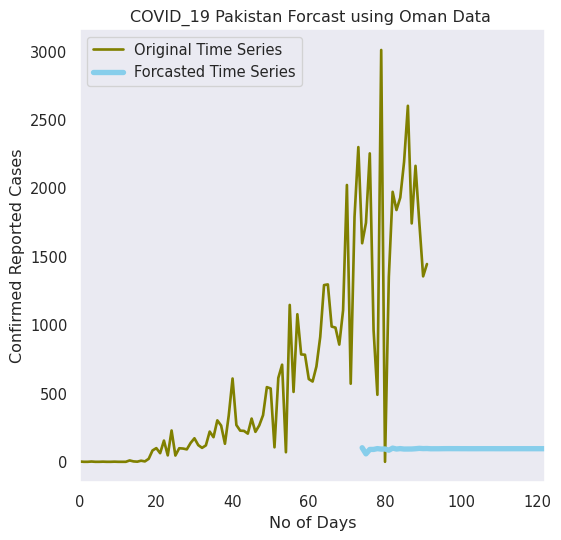

Root Mean Square Error for Oman:  218.19
Root Mean Square Error for Pakistan using Oman Data Forcasting:  1741.36


In [0]:
##Graph PLoting
##Importing Libary for plotting
import matplotlib.pyplot as plt
future_forcast=49

#Ranging test inputs
check_entries = norm_output_data[-16:].tolist()
##Predictor fnction calling on test data 
check_entries= predict(49,check_entries,lstm_model,16)
##Actual Forcasting
forcast_oman= scaler.inverse_transform(np.array(check_entries[16:] ).reshape(-1, 1))
##Setting initial and Final points to find the range
initial = (remove(COVID_19_transposed["Oman"].to_numpy())).shape[0] - 18
final = initial+future_forcast
x = np.arange(initial,final, 1)


##For Pakistan using Oman Data
# Initialise Graph Size with Dpi
my_dpi=96
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
##Seeting Graphs plot parameters
plt.plot(entry_diff(remove(COVID_19_transposed["Pakistan"]).to_numpy()),color='olive', linewidth=2, linestyle='solid', label="toto")
plt.plot(x,forcast_oman, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title("COVID_19 Pakistan Forcast using Oman Data ")
plt.ylabel('Confirmed Reported Cases')
plt.xlabel('No of Days')
plt.legend(["Original Time Series","Forcasted Time Series"])
plt.grid(False)
plt.autoscale(axis='x', tight=True)
plt.show()

##Calculating Root mean square error
oman_rmse = root_mean_square_error(forcast_oman.flatten()[0:18],
            (entry_diff(COVID_19_transposed['Oman']))[-18:])
print("Root Mean Square Error for Oman: ",round(oman_rmse,2))
pak_rmse= root_mean_square_error(forcast_oman.flatten()[0:18],
          (entry_diff(COVID_19_transposed["Pakistan"]))[-18:])
print("Root Mean Square Error for Pakistan using Oman Data Forcasting: ",round(pak_rmse,2))

##	Now use Pakistan time series and predict future cases until 27th June (one month into the future)

##Pakistan COVID_19 Forcasting Using Pakistan Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
##Traiing on Pakistan Data
##Calulating Difference Sequence and saving to numpy array
train_set = entry_diff(remove(COVID_19_transposed["Pakistan"].to_numpy()))
##Using Scaling Function
train_set = train_set[:-18]
train_set,scaler = scaling(train_set)
##Converting to pytorch Tensors
norm_output_data = convert(train_set)
##Geneting seqeunces
train_make_seq = make_seq(norm_output_data,25)
##Initializing LSTM model and serring hidden layer
lstm_model = LSTM(hidden_layer_size=100)
##Loss function 
loss_function = nn.MSELoss()
##Using Pytorch Optimizer
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.01)
optimize(150,train_make_seq,lstm_model,optimizer)
##Modeling
lstm_model.eval()

No of epoch:   1 Total Loss: 1.14900076
No of epoch:  26 Total Loss: 0.90562844
No of epoch:  51 Total Loss: 0.23680384
No of epoch:  76 Total Loss: 0.02047154
No of epoch: 101 Total Loss: 0.04824718
No of epoch: 126 Total Loss: 0.02586403
no of epoch: 149 Total loss: 0.0269842558


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

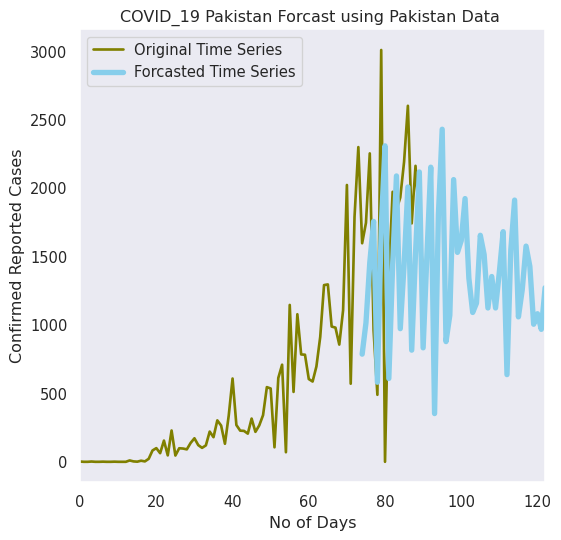

Root Mean Square Error for Pakistan using Pakistan Data Forcasting:  880.1


In [0]:
##Graph PLoting
##Importing Libary for plotting
import matplotlib.pyplot as plt
future_forcast=49

#Ranging test inputs
check_entries = norm_output_data[-25:].tolist()
##Predictor fnction calling on test data 
check_entries= predict(49,check_entries,lstm_model,25)
##Actual Forcasting
forcast_pak= scaler.inverse_transform(np.array(check_entries[25:] ).reshape(-1, 1))
##Setting initial and Final points to find the range
initial = (remove(COVID_19_transposed["Pakistan"].to_numpy())).shape[0] - 18
final = initial+future_forcast
x = np.arange(initial,final, 1)


##For Pakistan using Oman Data
# Initialise Graph Size with Dpi
my_dpi=96
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
##Seeting Graphs plot parameters
plt.plot(entry_diff(remove(COVID_19_transposed["Pakistan"]).to_numpy()),color='olive', linewidth=2, linestyle='solid', label="toto")
plt.plot(x,forcast_pak, markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.title("COVID_19 Pakistan Forcast using Pakistan Data ")
plt.ylabel('Confirmed Reported Cases')
plt.xlabel('No of Days')
plt.legend(["Original Time Series","Forcasted Time Series"])
plt.grid(False)
plt.autoscale(axis='x', tight=True)
plt.show()

##Calculating Root mean square error
pak_rmse= root_mean_square_error(forcast_pak.flatten()[0:18],
          (entry_diff(COVID_19_transposed["Pakistan"]))[-18:])
print("Root Mean Square Error for Pakistan using Pakistan Data Forcasting: ",round(pak_rmse,2))